## 03_Analysis

__Index__

1. __Loads cleaned dataset as pandas dataframe__ [⤵️](#1.-Loads-cleaned-dataset-as-pandas-dataframe)
1. __Displays histogram for each column__ [⤵️](#2.-Displays-histogram-for-each-column)
1. __Displays correlation between columns__ [⤵️](#3.-Displays-correlation-between-columns)
1. __Compares means between classes__ [⤵️](#4.-Compares-means-between-classes)
1. __Shows variance of features__ [⤵️](#5.-Shows-variance-of-features)
1. __Checks correlations when error value is set to -100__ [⤵️](#6.-Checks-correlations-when-error-value-is-set-to--100)
1. __Checks correlations when all rows with errors are dropped__ [⤵️](#7.-Checks-correlations-when-all-rows-with-errors-are-dropped)
1. __Displays class distribution in dataset__ [⤵️](#8.-Displays-class-distribution-in-dataset)

#### 0. Imports and loads dataset

In [1]:
# %load imports.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

#### 1. Loads cleaned dataset as pandas dataframe

In [4]:
df = pd.read_csv('output/data_cleaned.csv')
df.head()

,position,speed,check canonical,check description,check external links,check h1,check https,check internal links,check kw_count,check kw_density,...,source shop,source top,tools ads count,tools analytics count,tools caching count,tools content count,tools seo count,tools social count,url length,seo class
0,1.0,0.502,1,0,53,1,1,135,64,57.657,...,0,1,0,0,0,0,0,0,16,0
1,-1.0,0.502,1,0,53,1,1,135,64,57.657,...,0,1,0,0,0,0,0,0,16,0
2,2.0,2.698,1,1,37,3,1,140,9,9.473,...,0,1,0,0,0,0,0,0,98,3
3,3.0,2.377,1,1,15,2,1,149,6,13.333,...,0,1,0,1,0,0,0,0,28,3
4,-1.0,2.377,1,1,15,2,1,149,6,13.333,...,0,1,0,1,0,0,0,0,28,3


#### 2. Displays histogram for each column

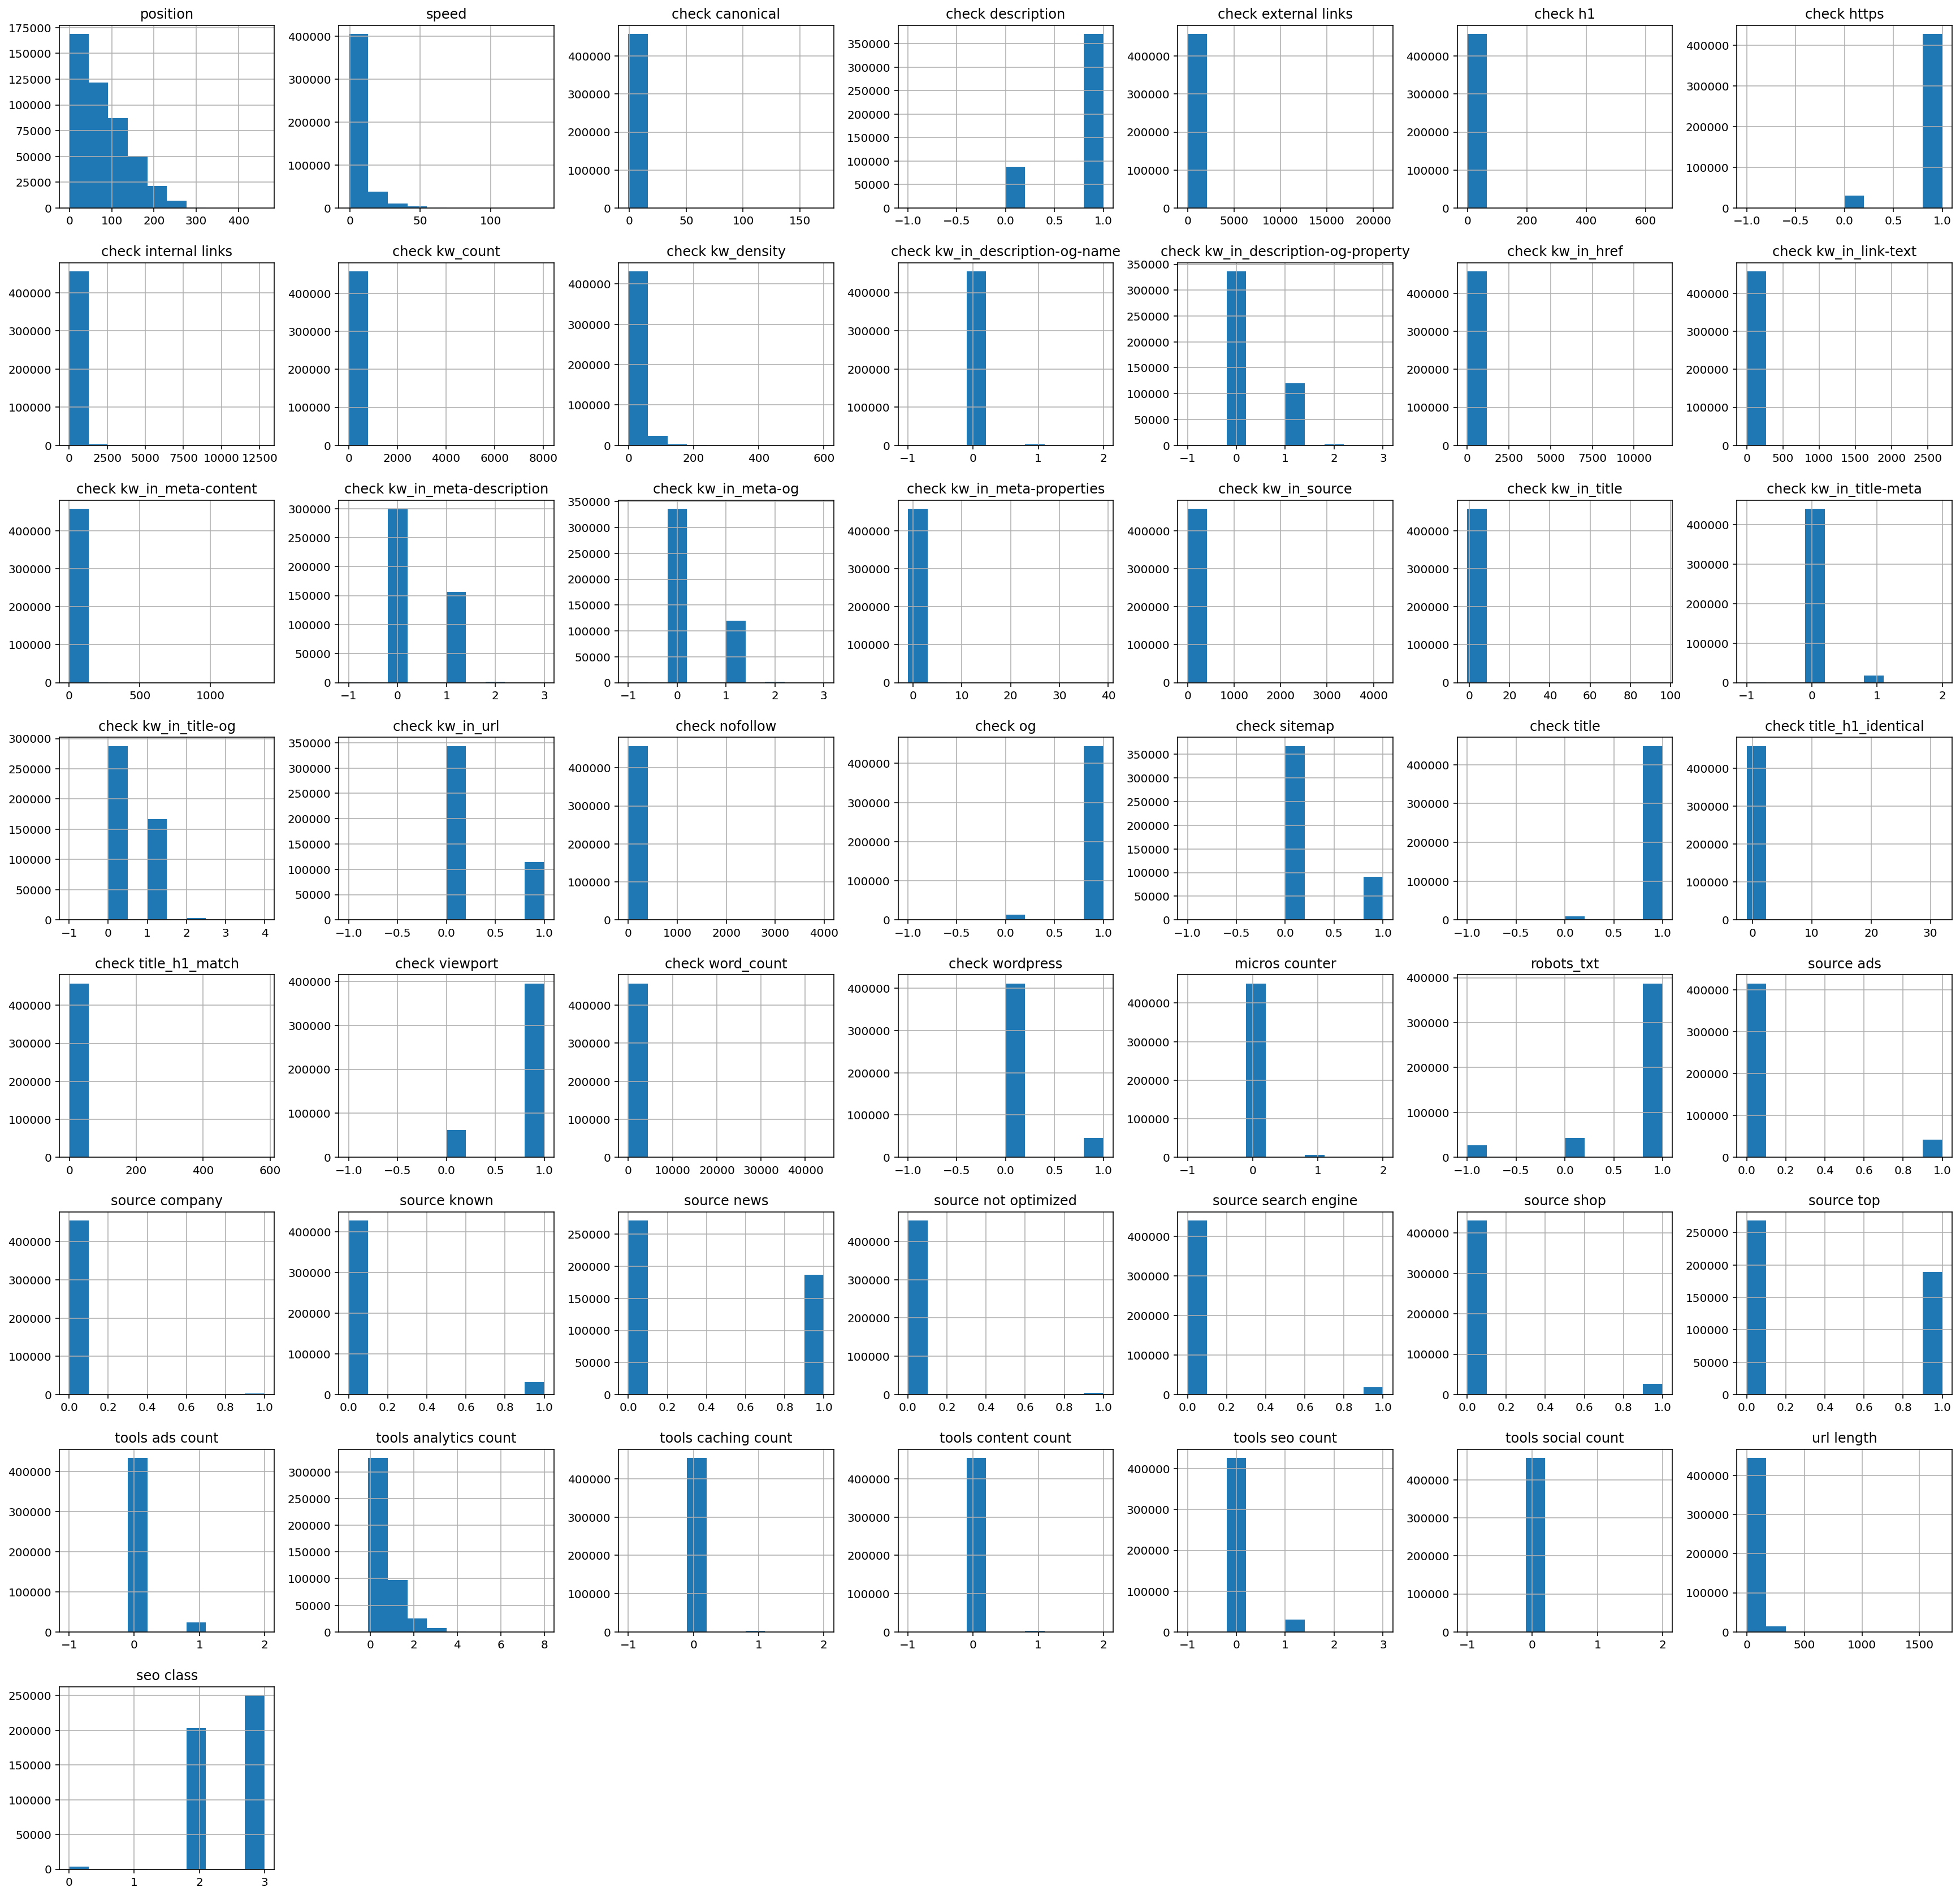

In [5]:
df.hist(figsize=(30,30));

#### 3. Displays correlation between columns

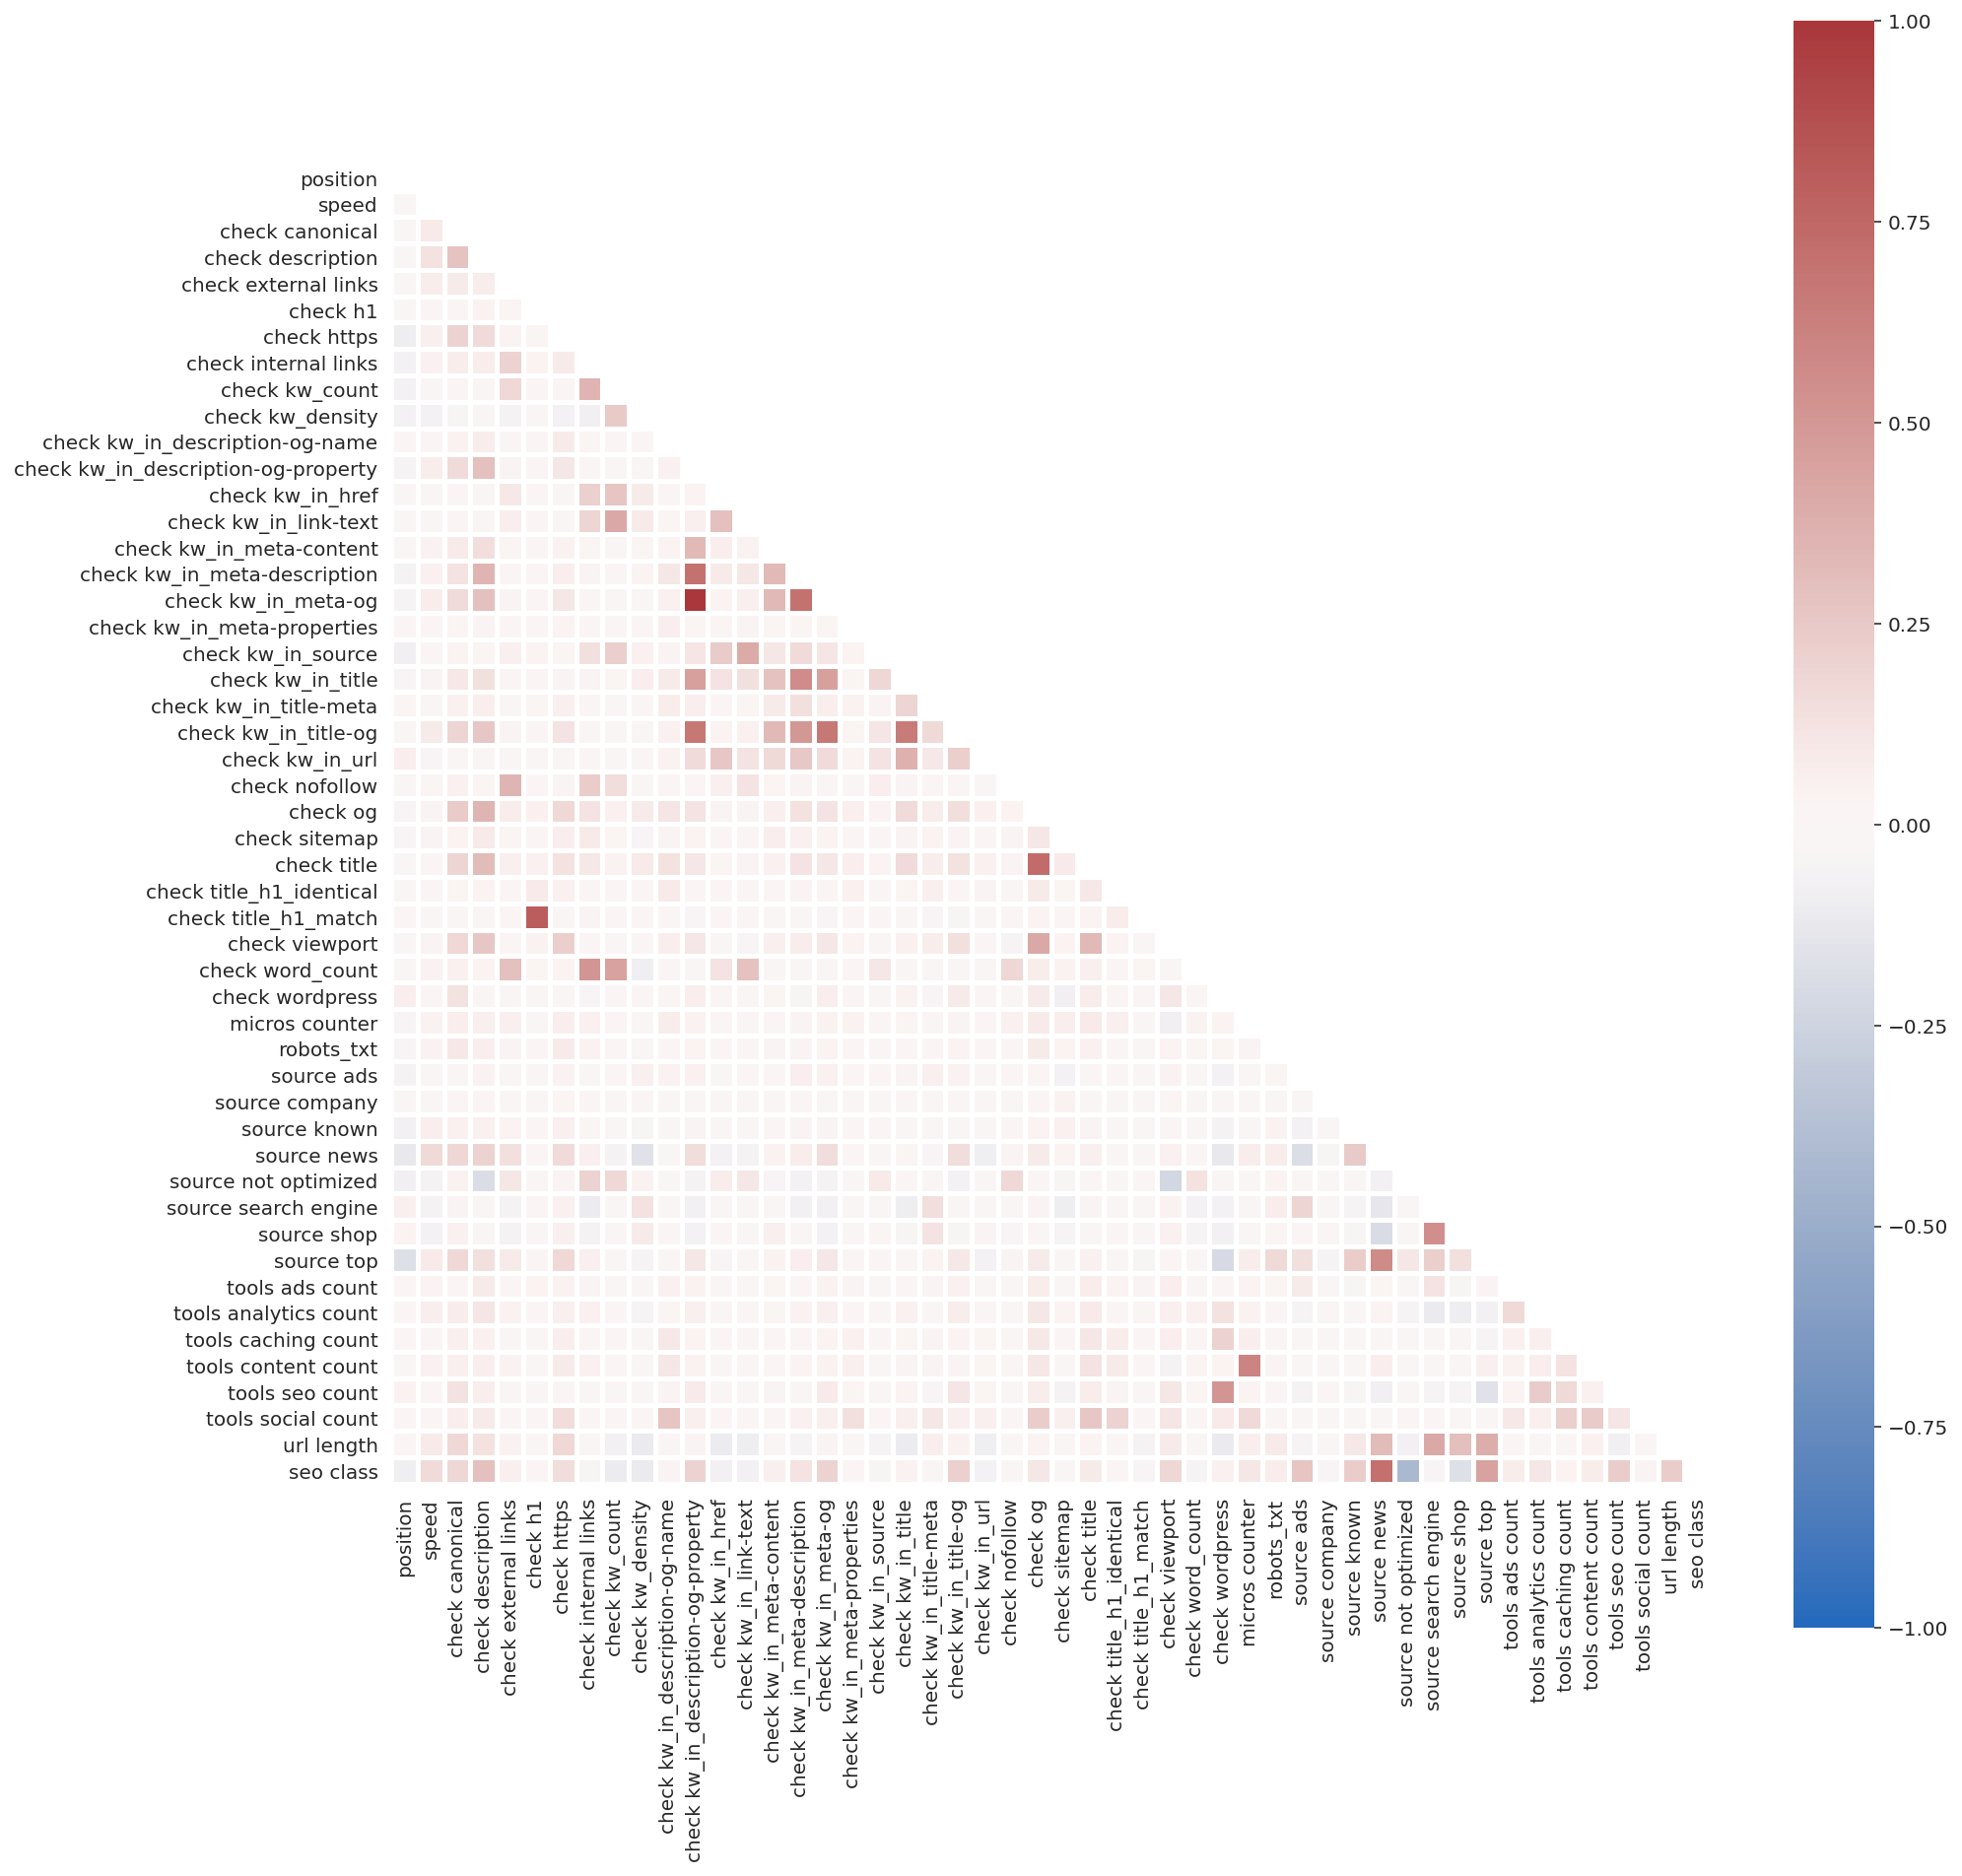

In [6]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=2, cmap="vlag")

#### 4. Compares means between classes

In [7]:
means = pd.pivot_table(df, columns=['seo class'], aggfunc=np.mean).round(2)
means.style.background_gradient(cmap='coolwarm', axis=1)

seo class,0,1,2,3
check canonical,1.000000,-0.190000,0.600000,0.850000
check description,0.000000,-0.120000,0.720000,0.900000
check external links,112.850000,0.280000,21.860000,38.870000
check h1,0.980000,0.050000,1.530000,1.550000
check https,1.000000,-0.190000,0.890000,0.970000
check internal links,614.140000,1.750000,133.310000,154.100000
check kw_count,128.150000,0.090000,18.930000,14.590000
check kw_density,27.730000,5.010000,18.880000,13.640000
check kw_in_description-og-name,0.000000,-0.190000,0.000000,0.010000
check kw_in_description-og-property,0.000000,-0.190000,0.170000,0.350000


#### 5. Shows variance of features

In [8]:
desc = df.describe().transpose()
desc['variance'] = df.var()

desc.drop(columns=['count', '25%', '50%', '75%'], inplace=True)
desc.round(2)

,mean,std,min,max,variance
position,77.47,61.57,-1.0,462.00,3790.97
speed,6.37,7.96,-1.0,138.22,63.42
check canonical,0.74,0.56,-1.0,171.00,0.31
check description,0.81,0.40,-1.0,1.00,0.16
check external links,31.91,74.03,-1.0,21052.00,5479.81
check h1,1.54,4.23,-1.0,658.00,17.93
check https,0.93,0.25,-1.0,1.00,0.06
check internal links,148.62,213.54,-1.0,12826.00,45599.21
check kw_count,17.47,57.63,-1.0,8032.00,3321.00
check kw_density,16.07,24.40,-1.0,600.00,595.56


#### 6. Checks correlations when error value is set to -100

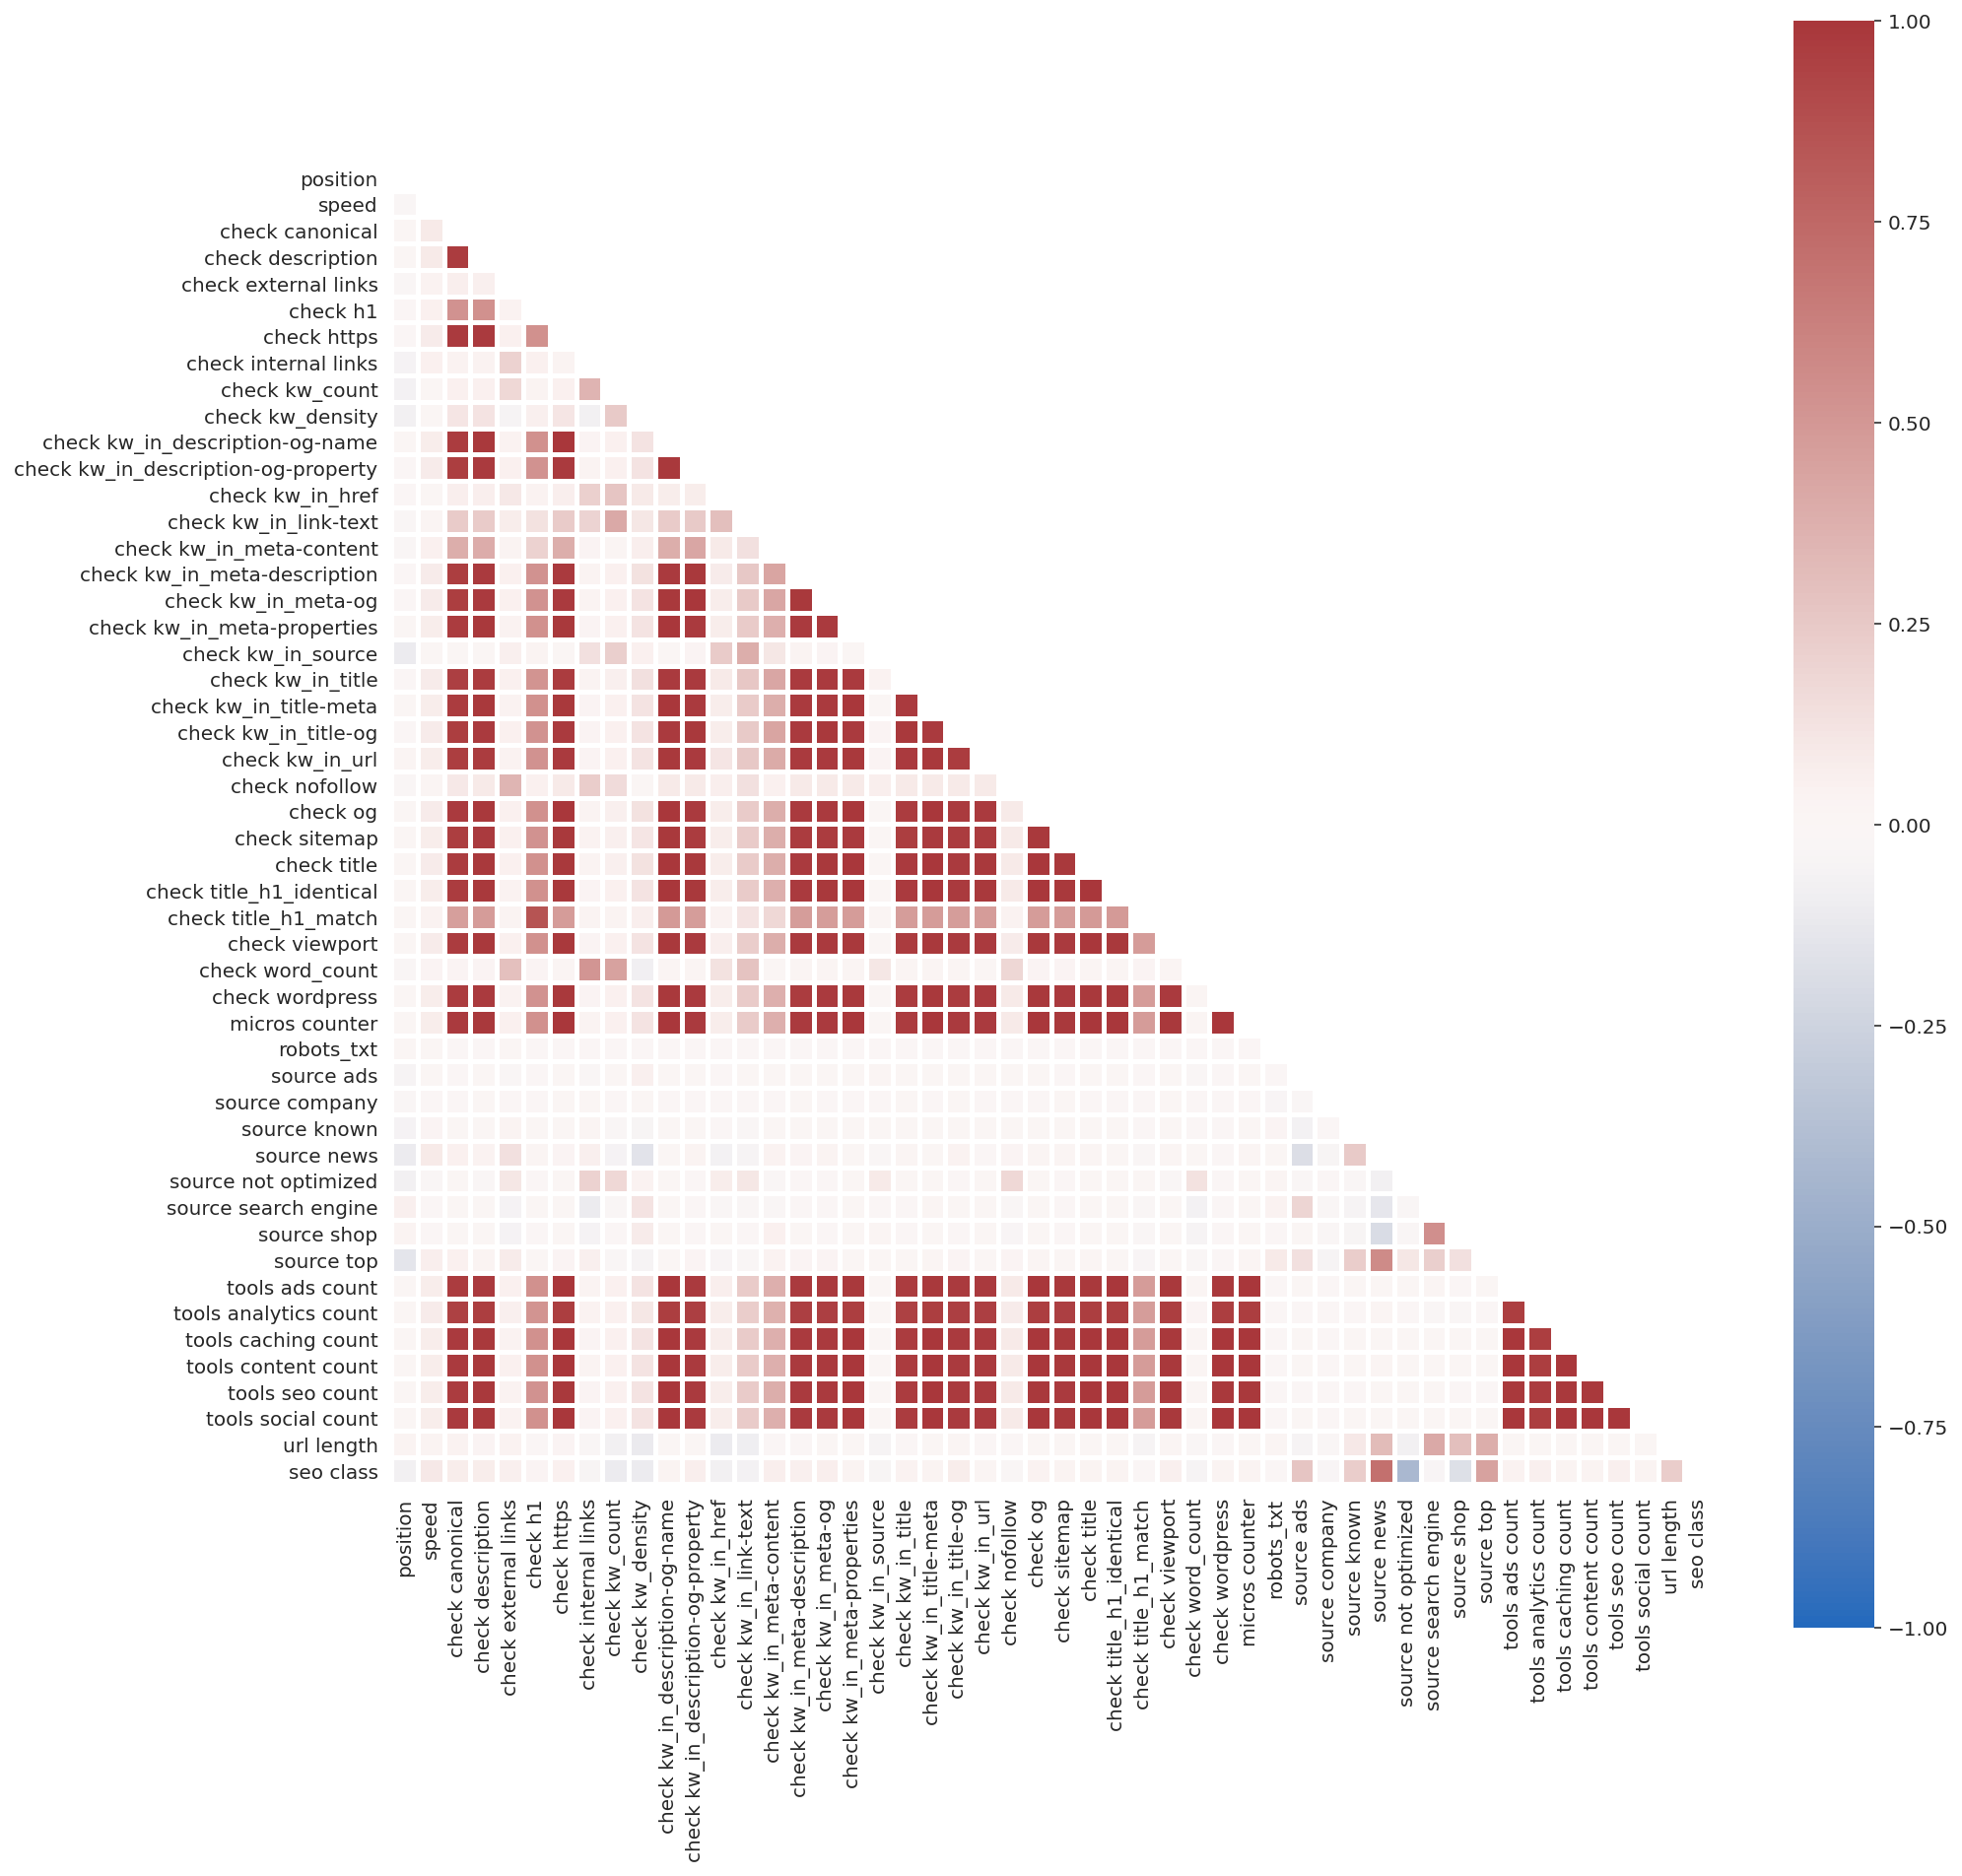

In [9]:
df100 = df.replace(-1,-100)
df100

corr = df100.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=2, cmap="vlag")

#### 7. Checks correlations when all rows with errors are dropped

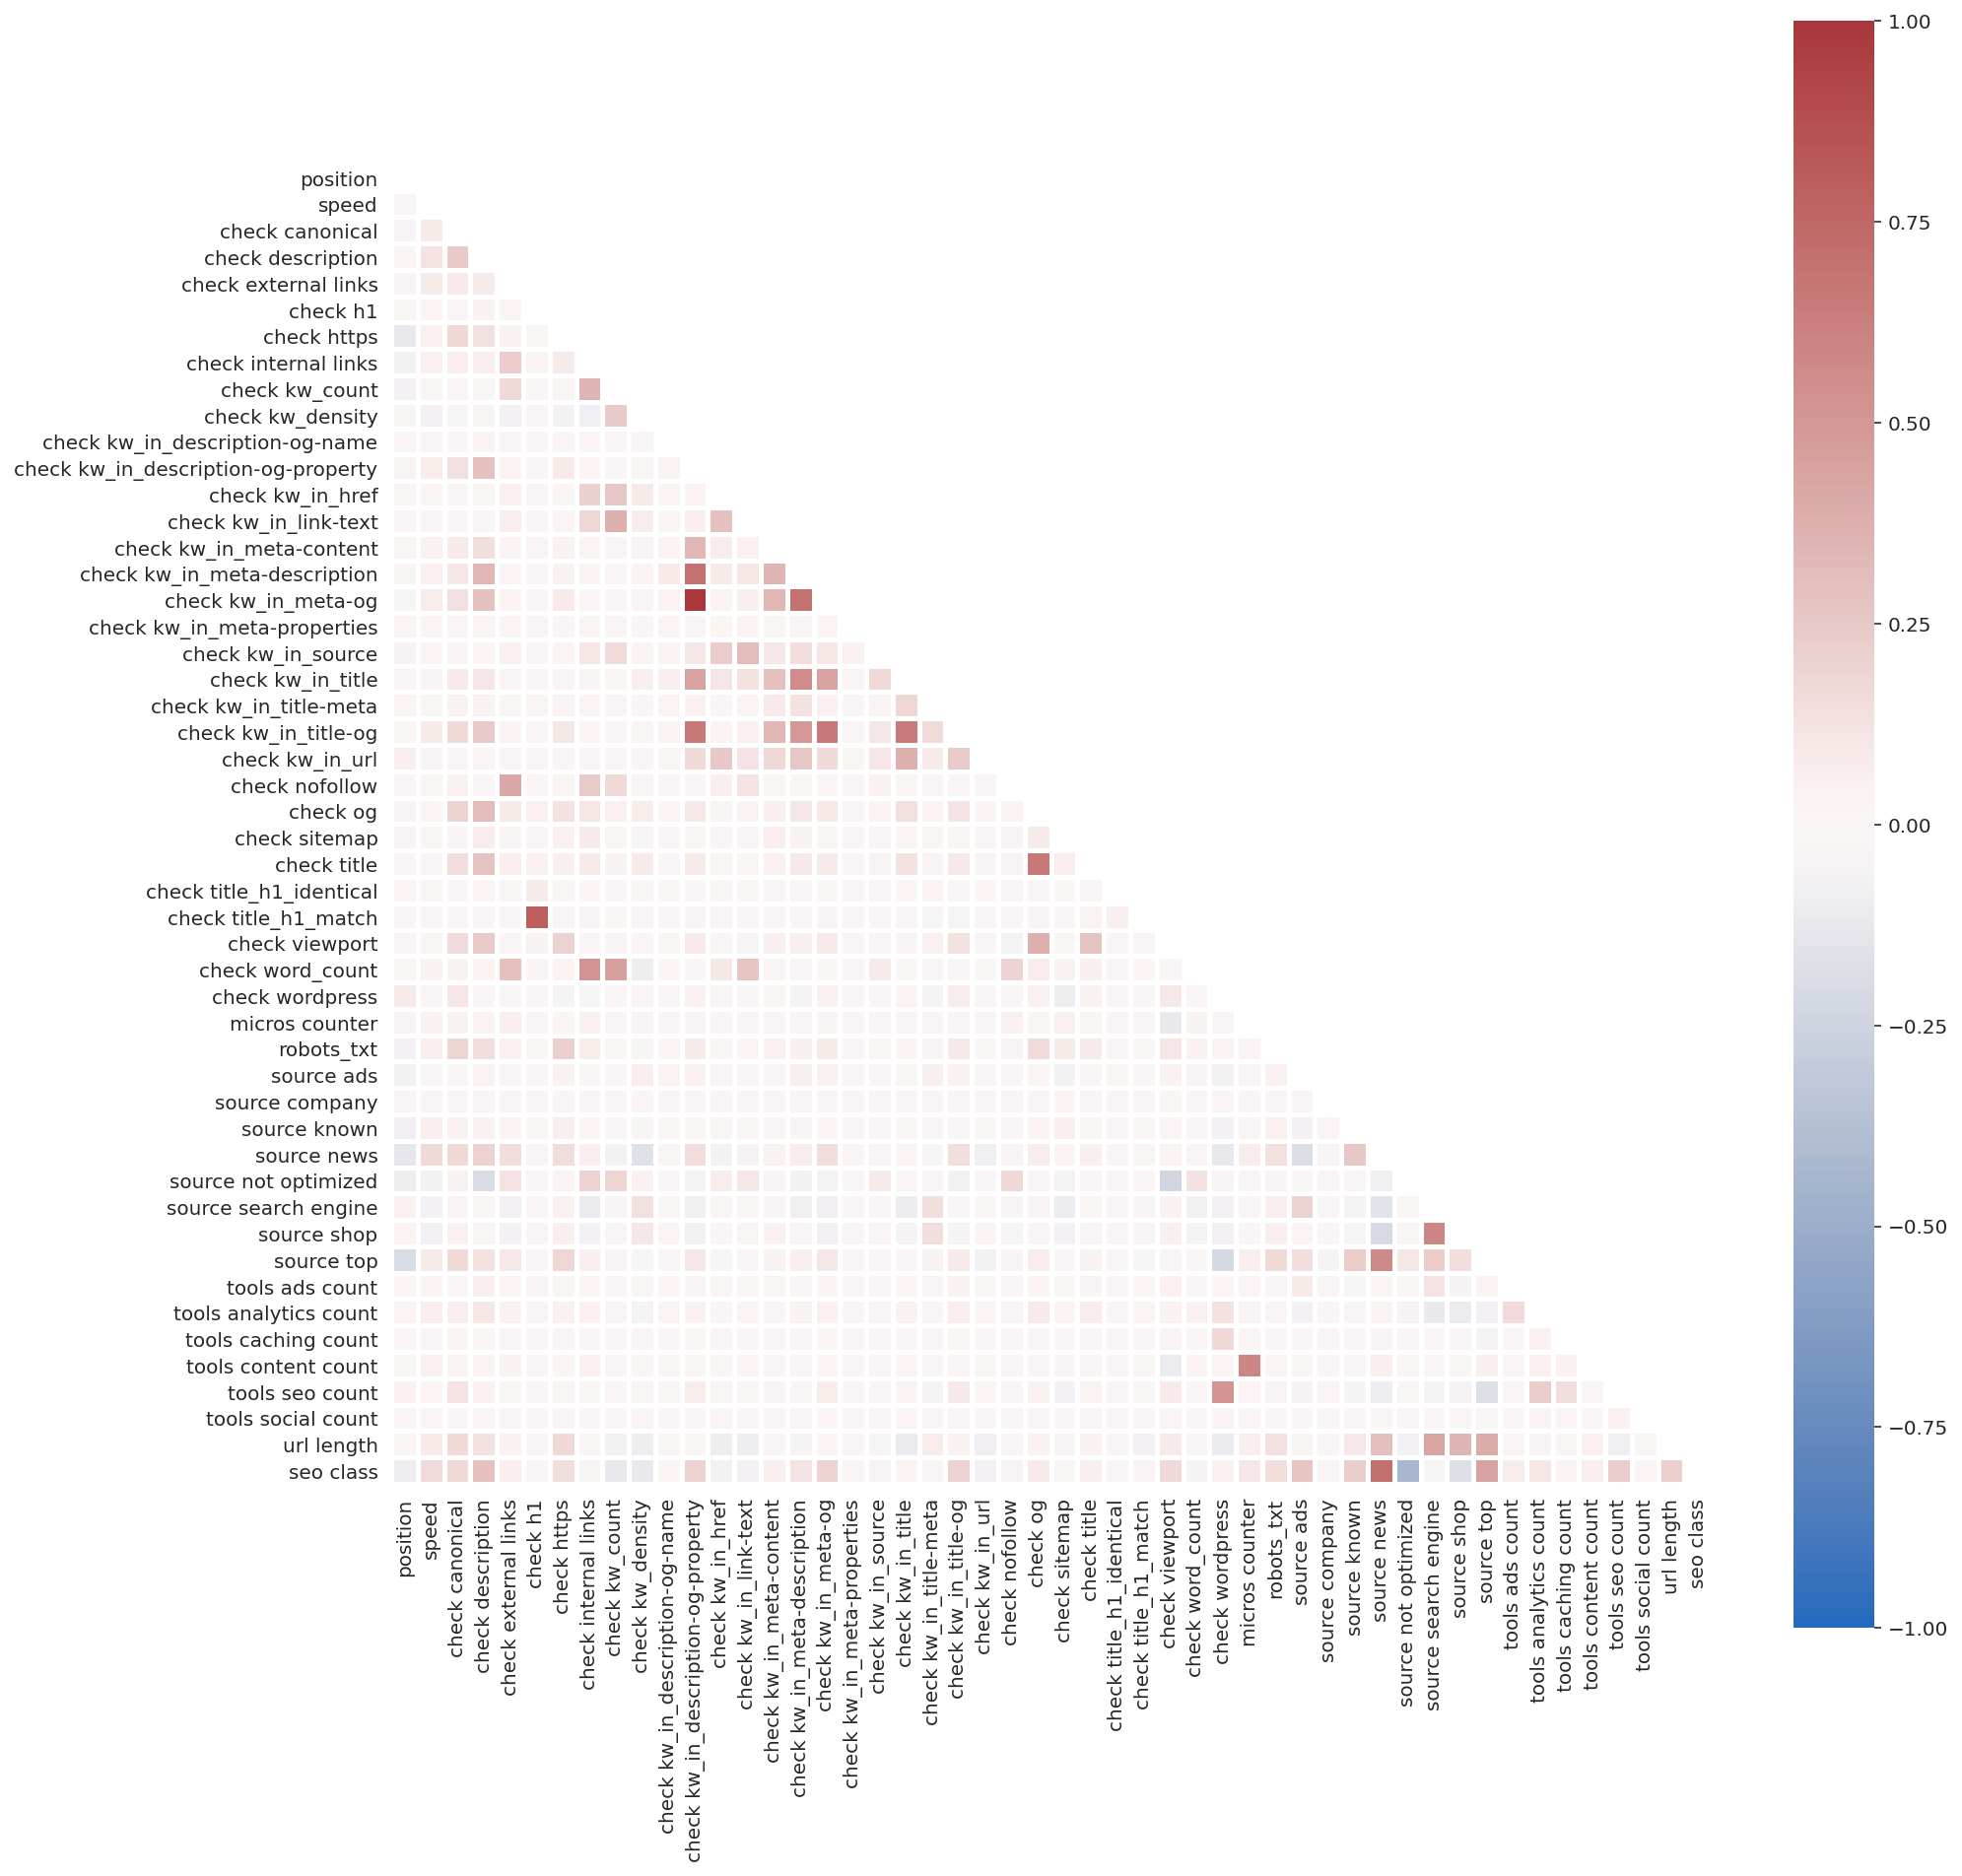

In [10]:
dfno1 = df[~df.lt(0).any(1)]

corr = dfno1.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15,15))
    ax = sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, center=0, square=True, linewidths=2, cmap="vlag")

#### 8. Displays class distribution in dataset

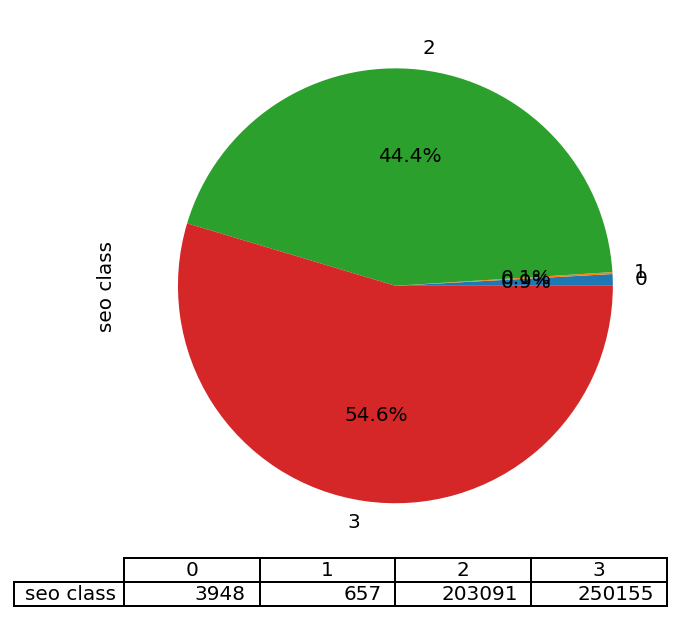

In [11]:
df['seo class'].value_counts().sort_index().plot.pie(table=True, autopct='%1.1f%%', figsize=(10,5));

Back to Top [⬆️](#03_Analysis)